In [1]:
%run preprocessing.py

Size of product : 49688
size of training set : 8474661
size of testing set : 4833292
Size of features of dataset : 32
0.0000    7645837
1.0000     828824
Name: reordered, dtype: int64
Class weight of 0 : 0.9021997458069414
Class weight of 1 : 0.09780025419305857


In [ ]:
train0 = usersXprod[(usersXprod.eval_set == "train")]
train = train0.drop(["eval_set", "user_id", "product_id", "order_id"], axis=1)

test0 = usersXprod[(usersXprod.eval_set == "test")]
test = test0.drop(["eval_set", "user_id", "product_id", "order_id", "reordered"], axis=1)

del usersXprod
print("size of training set :", train.shape[0])
print("size of testing set :", test.shape[0])


In [ ]:
X = train.drop(["reordered"], axis = 1)
y = train[["reordered"]]

class_weight_0 = (y.shape[0] - np.sum(y.reordered)) / y.shape[0]
class_weight_1 = np.sum(y.reordered) / y.shape[0]

print("Size of features of dataset :", X.shape[1])
print("Class weight of 0 :", class_weight_0)
print("Class weight of 1 :", class_weight_1)

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


/Users/Shawn/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 2)

X_train, X_val, y_train, y_val = train_test_split(np.array(X), Y, test_size = 0.2, random_state = 0)
print("Shape of X :", X_train.shape)
print("Shape of Y :", y_train.shape)

Using TensorFlow backend.


Shape of X : (6779728, 32)
Shape of Y : (6779728, 2)


In [4]:
''' set the size of mini-batch and number of epochs'''
batch_size = 32
nb_epoch = 2

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

print ('Building a model with dropout = 0.4')
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1]))
model.add(Activation('softplus'))
model.add(Dropout(0.4))
model.add(Dense(256))
model.add(Activation('softplus'))
model.add(Dropout(0.4))
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))

''' Setting optimizer as Adam '''
from keras.optimizers import  Adam
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])
model.summary()

Building a model with dropout = 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)  

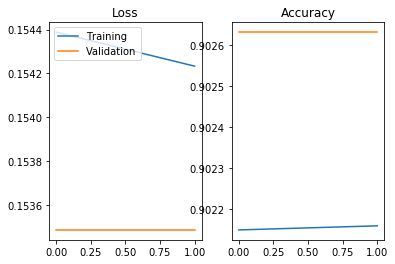

In [5]:
'''Fit models and use validation_split=0.1 '''
history_adam = model.fit(X_train, y_train,
                         batch_size = batch_size,
                         nb_epoch = nb_epoch,
                         verbose = 0,
                         shuffle = True,
                         validation_split = 0.1,
                         class_weight = {1: class_weight_1, 0: class_weight_0})

loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam, label = 'Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam, label = 'Validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label = 'Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label = 'Validation')
plt.title('Accuracy')
plt.show()

In [6]:
y_pred = model.predict(X_val, batch_size = 32, verbose = 0)
y_pred = pd.DataFrame(y_pred, columns = ["no", "yes"])
y_val = pd.DataFrame(y_val, columns = ["no", "yes"])
print('Misclassified samples: %d' % (y_val.no != y_pred.no).sum())
print('Accuracy : %.2f' % ((y_val.no == y_pred.no).sum() / y_val.no.shape[0]))
print('Accuracy (sklearn): %.2f' % accuracy_score(y_val.no, y_pred.no))
print("==confusion matrix==")
print(confusion_matrix(y_val.no, y_pred.no, labels = [0,1], sample_weight = None))


Misclassified samples: 165804
Accuracy : 0.90
Accuracy (sklearn): 0.90
==confusion matrix==
[[      0  165804]
 [      0 1529129]]
